# Separating Overlapping Bison in a Mask

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import watershed
from skimage.color import label2rgb
import aux_functions as aux_func
from skimage.measure import regionprops

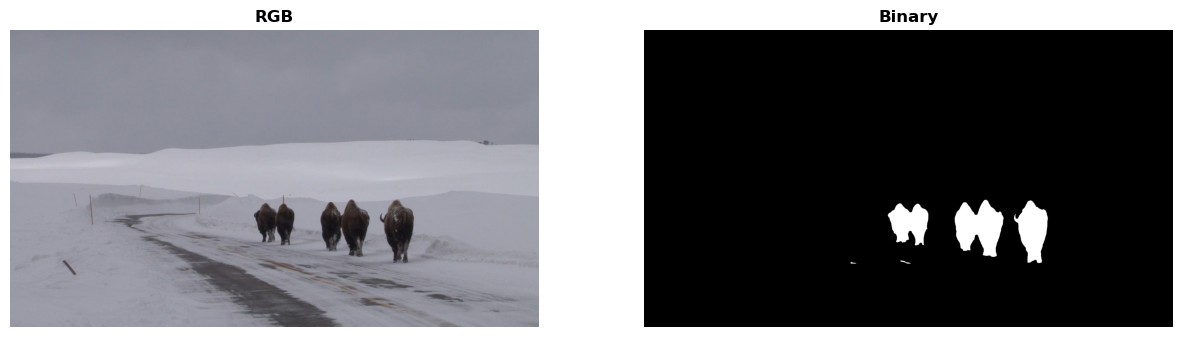

In [2]:
bison = cv2.imread("./images/bison.jpg")
bison = cv2.cvtColor(bison, cv2.COLOR_BGR2RGB)
bison_binary = aux_func.bison_mask(bison, (600, 850, 750, 1500))

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(bison)
axs[0].axis('off')
axs[0].set_title("RGB")
axs[1].imshow(bison_binary, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Binary")
plt.show()

To apply watershed, we need a grayscale image that approximately marks the bison. We can often use a distance matrix for the grayscale image. In the distance matrix, each pixel is assigned a value that is the minimal distance between that pixel and the background.
We can use the [cv2.distanceTransform()](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ga25c259e7e2fa2ac70de4606ea800f12f) function to calculate the distance matrix that assigns a value to each pixel that is the minimal distance between that pixel and the nearest non-zero pixel.

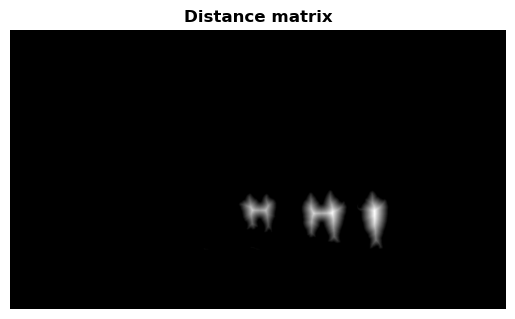

In [3]:
distance = cv2.distanceTransform(bison_binary.astype(np.uint8), cv2.DIST_L2, 5)

plt.imshow(distance, cmap='gray')
plt.title("Distance matrix")
plt.axis('off')
plt.show()

Since the background needs to be bright to apply watershed, we need to take the complement of the grayscale image.

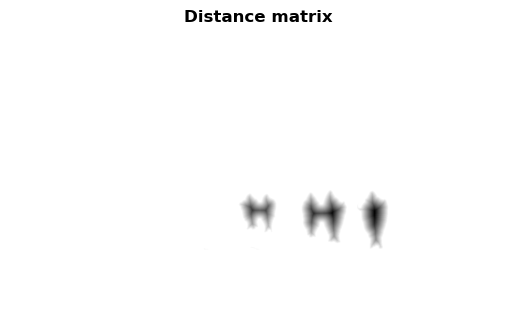

In [4]:
distance = ~distance.astype(np.uint8)

plt.imshow(distance, cmap='gray')
plt.title("Distance matrix")
plt.axis('off')
plt.show()

We can suppress minima with depth less than h by implementing a function similar to [imhmin()](https://www.mathworks.com/help/images/ref/imhmin.html) from MathWorks.

In [5]:
distance = aux_func.hminima(distance, 4)

We can apply the watershed algorithm to a grayscale image using the [watershed()](https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.watershed) function.

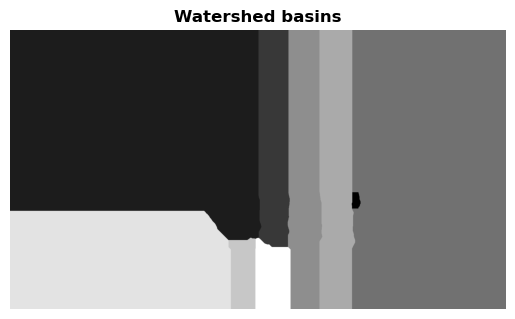

In [6]:
bison_separated = watershed(distance)

plt.imshow(bison_separated, cmap='gray')
plt.title("Watershed basins")
plt.axis('off')
plt.show()

We can use a mask to assign background pixels to be a certain value.

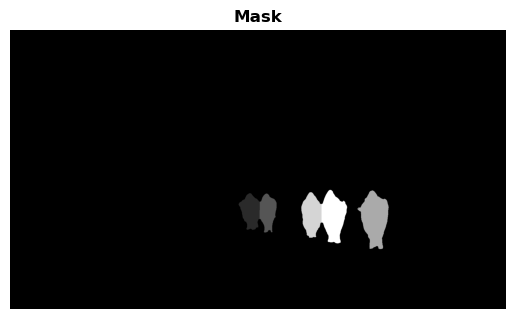

In [9]:
bison_separated[~bison_binary] = 0
for region in regionprops(bison_separated):
        if region.area < 2000:
            bison_separated[bison_separated == region.label] = 0

plt.imshow(bison_separated, cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

Overlay label matrix regions on 2-D image

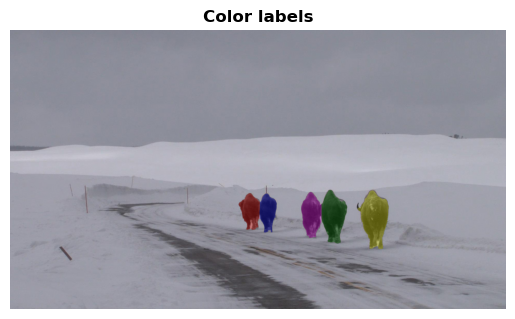

In [10]:
bison_rgb = label2rgb(bison_separated, image=bison, bg_label=0)
for i in range(3):
    bison_rgb[~bison_binary, i] = bison[~bison_binary, i] / 255

plt.imshow(bison_rgb)
plt.axis('off')
plt.title('Color labels')
plt.show()